<a href="https://colab.research.google.com/github/prasannajitwta/1JT18IS046_WT/blob/main/fyp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**## IMPORT DATA FROM KAGGLE**

In [1]:
pip install kaggle

In [2]:
! pip install kaggle



In [3]:
! mkdir ~/.kaggle

In [11]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Load from kaggle

In [12]:
! kaggle datasets download kmader/skin-cancer-mnist-ham10000


100% 5.18G/5.20G [00:31<00:00, 169MB/s]
100% 5.20G/5.20G [00:31<00:00, 178MB/s]


In [14]:
! unzip skin-cancer-mnist-ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

# Importing Essential Libraries

In [15]:
import numpy as np
import pandas as pd
import os
import sys
from glob import glob
import tensorflow.keras
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from PIL import Image
np.random.seed(123)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Data processing

In [32]:
base_skin_dir = os.path.join('archive')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                   for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_dict = {     
                  'nv': 'Melanocytic nevi',
                  'mel': 'Melanoma',
                  'bkl': 'Benign keratosis-like lesions ',
                  'bcc': 'Basal cell carcinoma',
                  'akiec': 'Actinic keratoses',
                  'vasc': 'Vascular lesions',
                  'df': 'Dermatofibroma'
              }

In [33]:
print("Reading Dataset and adding new columns:")

dataset = pd.read_csv('archive/HAM10000_metadata.csv')

dataset['path'] = dataset['image_id'].map(imageid_path_dict.get)
dataset['cell_type'] = dataset['dx'].map(lesion_dict.get)
dataset['cell_codes'] = pd.Categorical(dataset['cell_type']).codes

Reading Dataset and adding new columns:


In [17]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


## Data Cleaning

In [18]:
dataset.isnull().sum()

lesion_id           0
image_id            0
dx                  0
dx_type             0
age                57
sex                 0
localization        0
path            10015
cell_type           0
cell_codes          0
dtype: int64

In [19]:
dataset['age'].fillna((dataset['age'].mean()), inplace=True)

In [20]:
dataset.isnull().sum()

lesion_id           0
image_id            0
dx                  0
dx_type             0
age                 0
sex                 0
localization        0
path            10015
cell_type           0
cell_codes          0
dtype: int64

# Visualisations


In [21]:
def DIE():
    
    from IPython.display import HTML
    from IPython.display import display

    tag = HTML('''<script>
    code_show=true; 
    function code_toggle() 
    {
        if (code_show)
        {
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else 
        {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">CODE</a>.''')
    display(tag)
DIE()

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Cell type count bar diagram


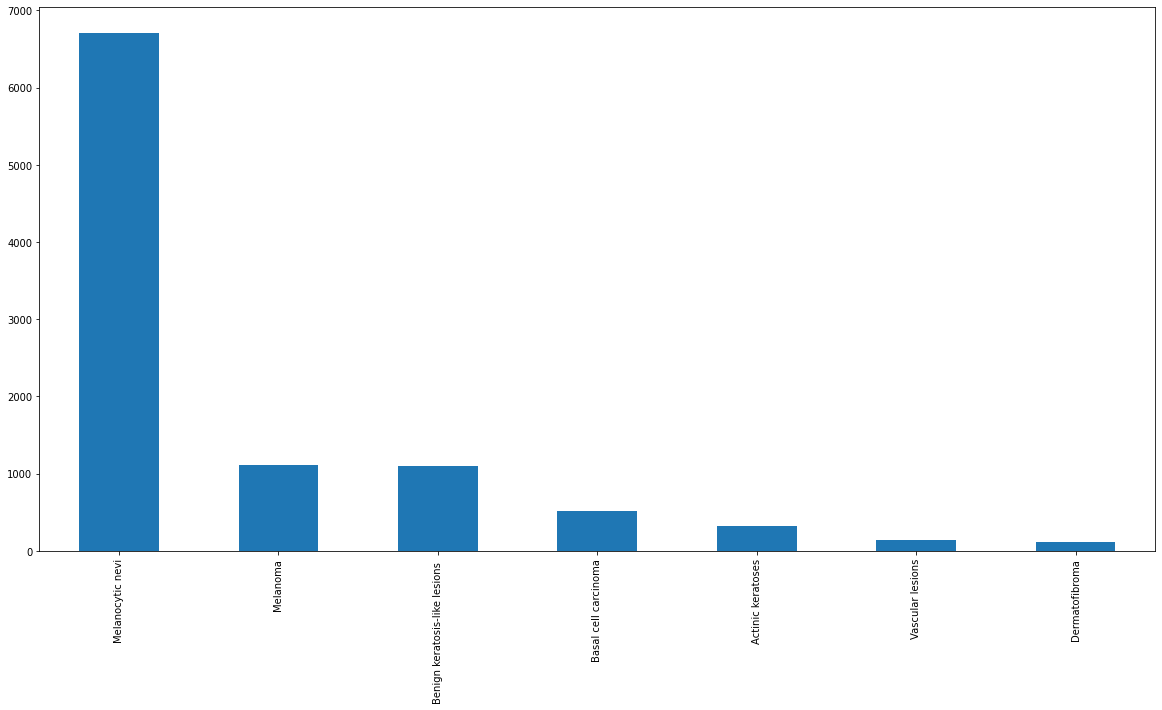

In [23]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
dataset['cell_type'].value_counts().plot(kind='bar', ax = ax1)

Method count bar diagram

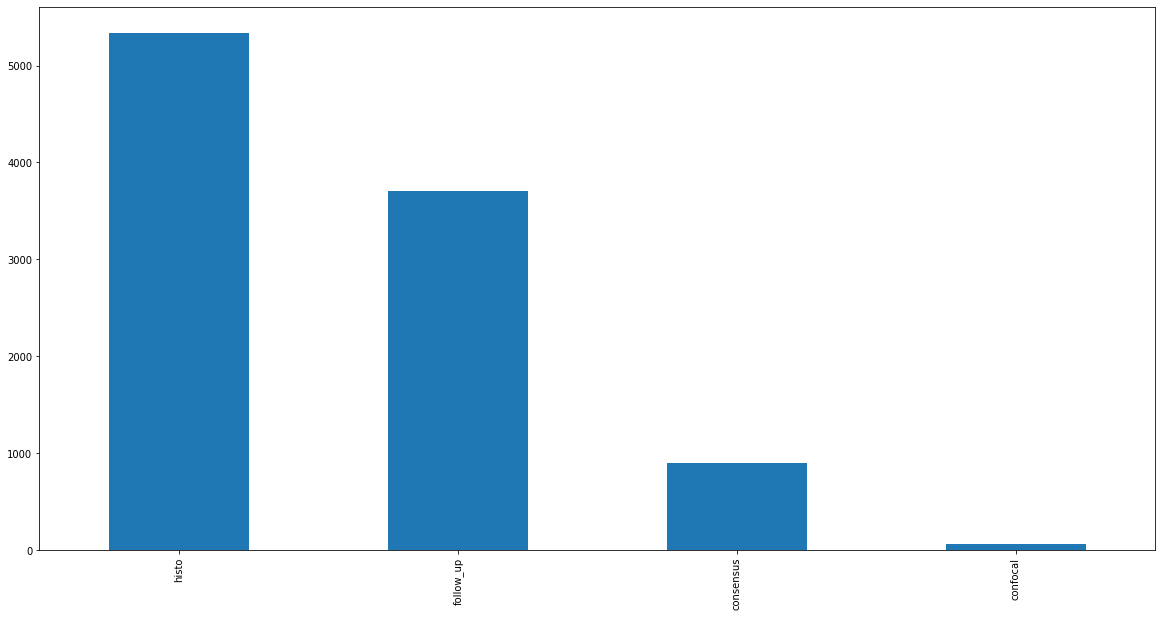

In [24]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (20, 10))
dataset['dx_type'].value_counts().plot(kind='bar')

Region count bar diagram

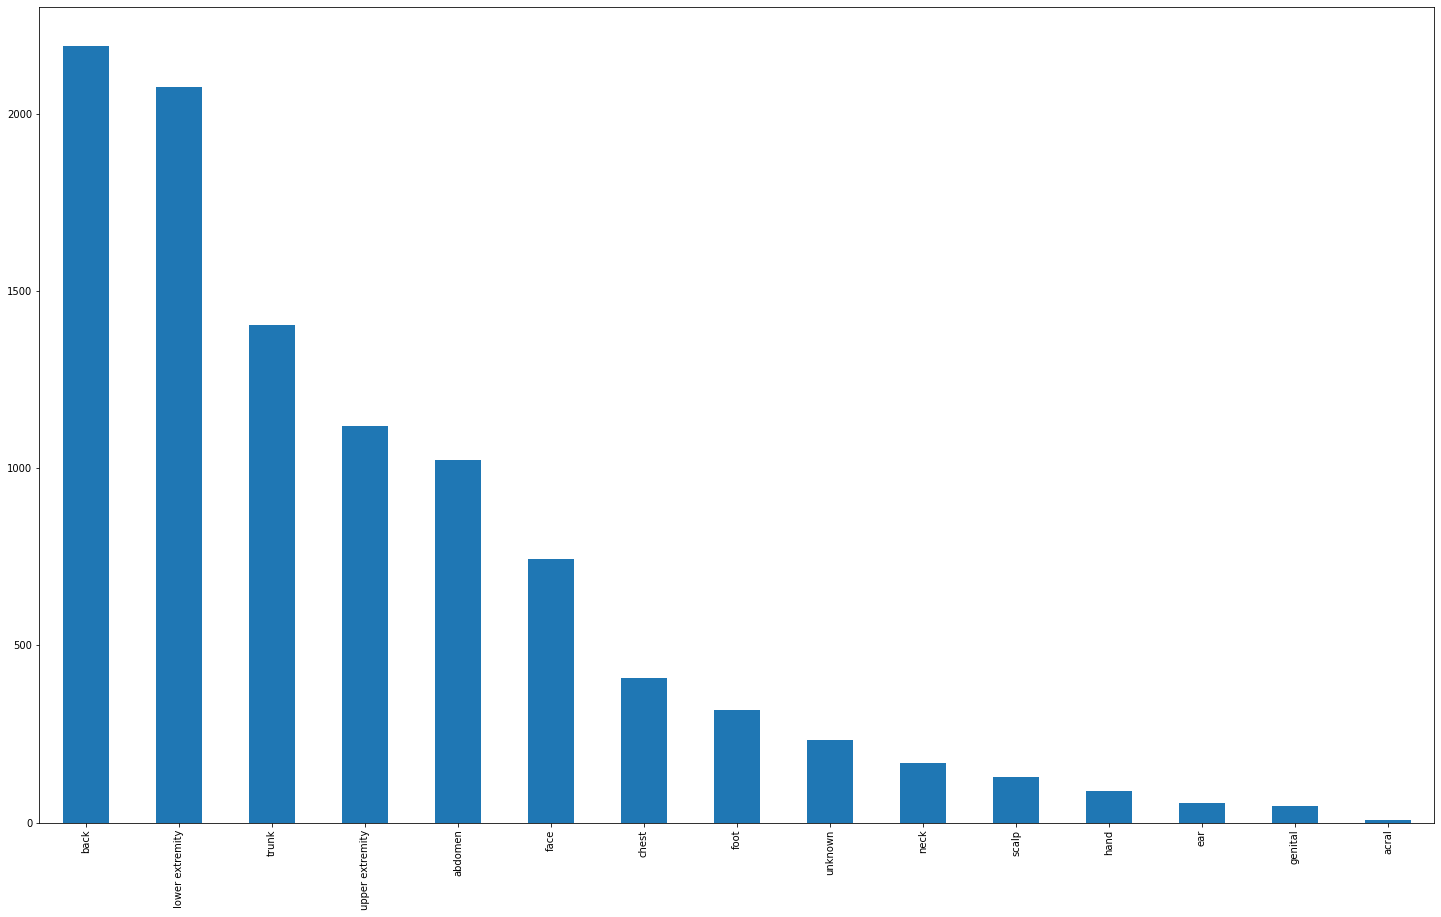

In [25]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['localization'].value_counts().plot(kind='bar')

Age count histogram

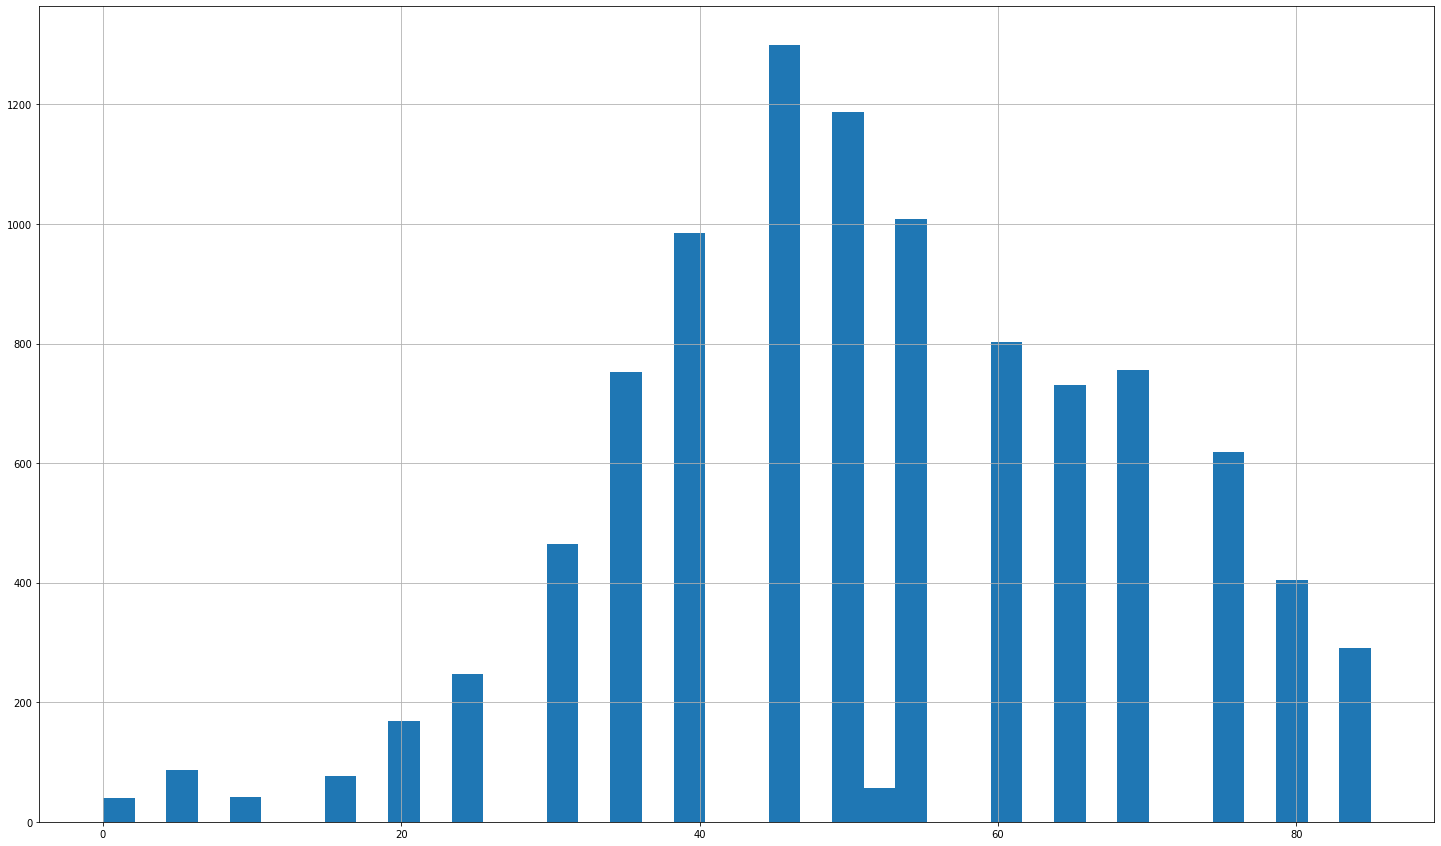

In [26]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['age'].hist(bins=40)


Cell type count histogram

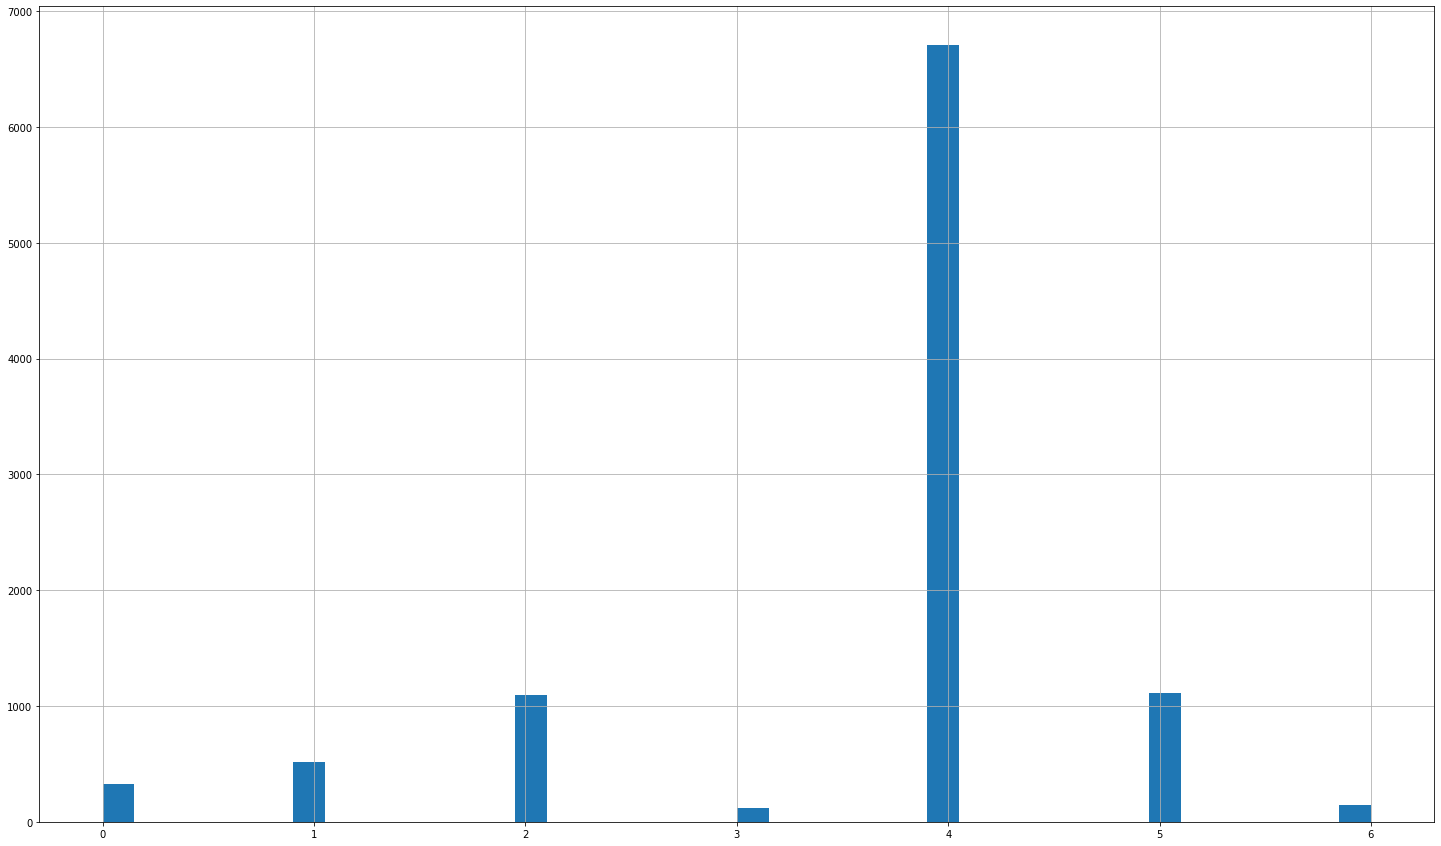

In [27]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['cell_codes'].hist(bins=40)

### **Resizing the images**

In [34]:
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [29]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


## **Displaying Samples**

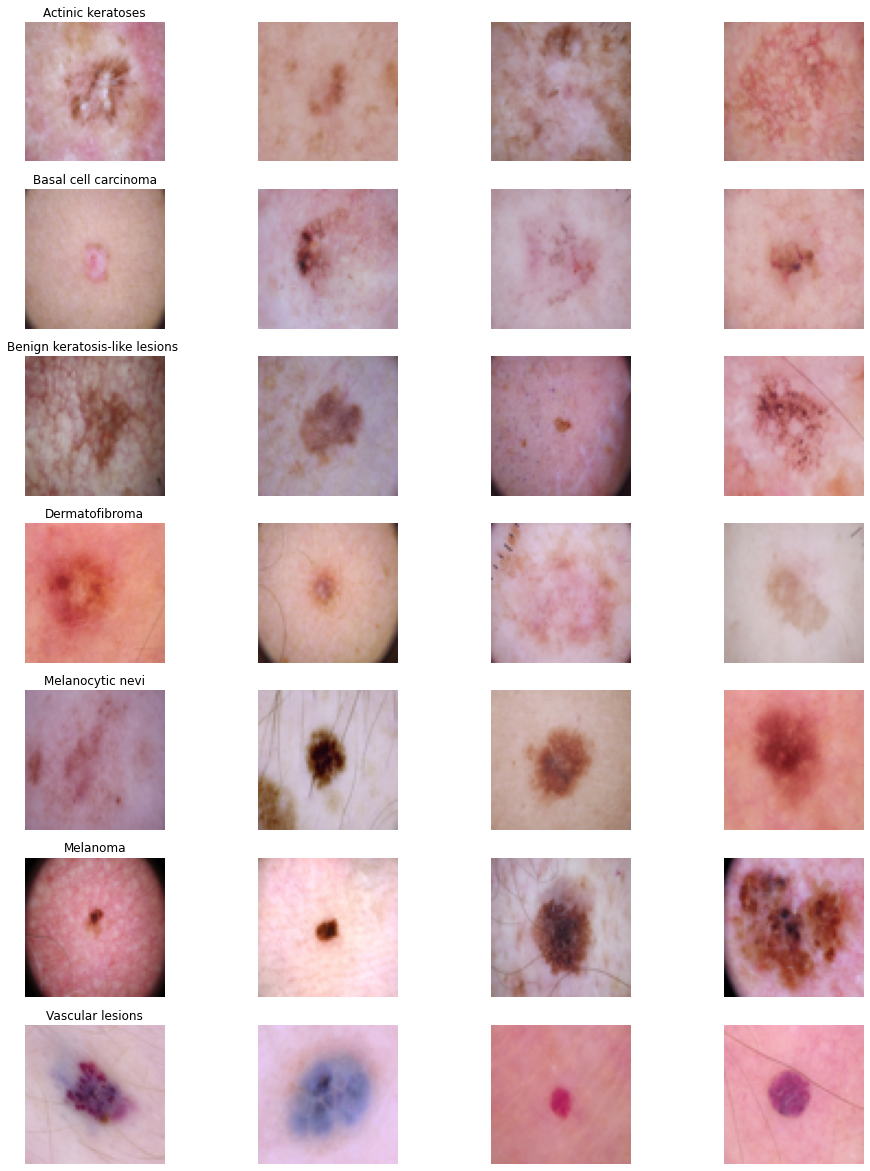

In [35]:
DIE()
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(7, 4, figsize = (4*4, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,dataset.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(7, random_state=1).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)


# **Selecting the features and targets**

In [36]:
features=dataset.drop(columns=['cell_codes'],axis=1)
target=dataset['cell_codes']

Train test splitting

In [37]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.20,random_state=2)


# **Normalising the training set**


Normalisation reduces data redundancy.It is a process to eliminate the flaws of a database with bad design. A poorly designed database is inconsistent and create issues while adding, deleting or updating information

In [38]:
x_train = np.asarray(x_train1['image'].tolist())
x_test = np.asarray(x_test1['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# **Performing one-hot encoding on the labels**


In [39]:

y_train = to_categorical(y_train1, num_classes = 7)
y_test = to_categorical(y_test1, num_classes = 7)

# **Validation and training set splitting**

In [40]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)


Reshaping image in 4 dimensions

In [41]:
x_train = x_train.reshape(x_train.shape[0], *(64, 64, 3))
x_test = x_test.reshape(x_test.shape[0], *(64, 64, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(64, 64, 3))

# **CNN**

CNN
USING KERAS TENSORFLOW IN BACKEND


In this model, we first appply different feature detectors or kernels onto the input image to get the first two convoled layers then we apply Max Pooling to get the max pooled layer and similiarly we obtain the next layers and finally we obtain the Flatten layer using Flatten(). Then the fully connected layers(hidden layers) to finally give the output layer of 7 neurons.

In [42]:
shape = (64, 64, 3)

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), activation='relu',input_shape=shape))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Dropout(0.05))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.10))

classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.15))
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.20))

classifier.add(Dense(7, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

# **Compiling the model**

In [43]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

# **Categorical Cross Entropy**


Categorical cross entropy is a Softmax activation plus a Cross-Entropy loss. While using this loss, we train a CNN to output a probability over the C classes for each image. It is used for multi-class classification.

In [44]:
datagen = ImageDataGenerator(
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            rotation_range=10, 
                            zoom_range = 0.1,  
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,  
                            vertical_flip=False
                            )
datagen.fit(x_train)

# **Fitting the model**


In [45]:
epochs = 50
batch_size = 10
history = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              steps_per_epoch=x_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
721/721 [==============================] - 23s 17ms/step - loss: 1.0400 - accuracy: 0.6564 - val_loss: 0.8625 - val_accuracy: 0.6920
Epoch 2/50
721/721 [==============================] - 11s 16ms/step - loss: 0.9263 - accuracy: 0.6759 - val_loss: 0.8297 - val_accuracy: 0.6983
Epoch 3/50
721/721 [==============================] - 11s 16ms/step - loss: 0.8699 - accuracy: 0.6893 - val_loss: 0.8136 - val_accuracy: 0.7157
Epoch 4/50
721/721 [==============================] - 11s 15ms/step - loss: 0.8503 - accuracy: 0.6986 - val_loss: 0.7774 - val_accuracy: 0.7219
Epoch 5/50
721/721 [==============================] - 11s 16ms/step - loss: 0.8285 - accuracy: 0.7014 - val_loss: 0.7381 - val_accuracy: 0.7157
Epoch 6/50
721/721 [==============================] - 11s 15ms/step - loss: 0.8209 - accuracy: 0.7075 - val_loss: 0.7650 - val_accuracy: 0.7269
Epoch 7/50
721/721 [==============================] - 11s 16ms/step - loss: 0.8074 - accuracy: 0.7076 - val_loss: 0.8214 - val_accuracy:

# **Calculating validation set and test set accuracies**

In [46]:
loss, accuracy = classifier.evaluate(x_test, y_test)
loss_v, accuracy_v = classifier.evaluate(x_validate, y_validate)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
classifier.save("classify.h5")

26/26 [==============================] - 0s 6ms/step - loss: 0.6562 - accuracy: 0.7768
Validation: accuracy = 0.776808  ;  loss_v = 0.656224
Test: accuracy = 0.774338  ;  loss = 0.663599


Plotting model's validation loss and validation accuracy

In [47]:
DIE()
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


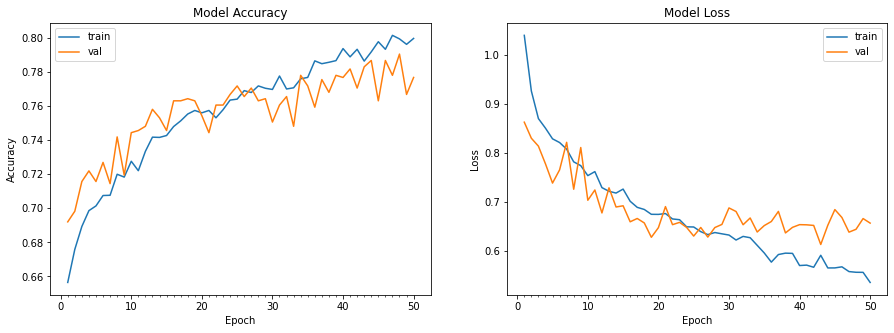

In [48]:
plot_model_history(history)

# **Confusion Matrix**

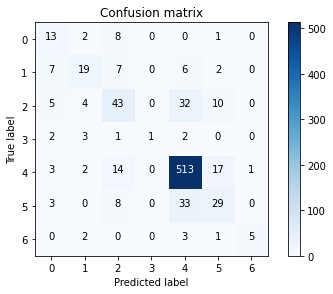

In [49]:
DIE()
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    decoy = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > decoy else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Predicting the values from the validation dataset
Y_pred = classifier.predict(x_validate)
#Converting predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Converting validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
#Computing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(7))

**Prediction "inserting images"**

### **OUTPUT**

In [52]:
from keras.preprocessing import image
test_image1 = image.load_img('test1.jpg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result = classifier.predict(test_image1)
if result[0][0] == 1:
    print('TYPE:-\n Actinic keratoses')
elif result[0][1] == 1:
    print('TYPE:-\n Basal cell carcinoma')
elif result[0][2] == 1:
    print('TYPE:-\n Benign keratosis-like lesions')
elif result[0][3] == 1:
    print('TYPE:-\n Dermatofibroma')
elif result[0][4] ==1 :
    print('TYPE:-\n Melanoma')
elif result[0][5] == 1:
    print('TYPE:-\n Melanocytic nevi')
elif result[0][6] == 1:
    print('TYPE:-\n Vascular lesions')

TYPE:-
 Melanoma


In [53]:
from keras.preprocessing import image
test_image1 = image.load_img('test2.jpg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result = classifier.predict(test_image1)
if result[0][0] == 1:
    print('TYPE:-\n Actinic keratoses')
elif result[0][1] == 1:
    print('TYPE:-\n Basal cell carcinoma')
elif result[0][2] == 1:
    print('TYPE:-\n Benign keratosis-like lesions')
elif result[0][3] == 1:
    print('TYPE:-\n Dermatofibroma')
elif result[0][4] ==1 :
    print('TYPE:-\n Melanoma')
elif result[0][5] == 1:
    print('TYPE:-\n Melanocytic nevi')
elif result[0][6] == 1:
    print('TYPE:-\n Vascular lesions')

TYPE:-
 Basal cell carcinoma
